<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_05/g_graph_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05: Data preparation and Processing - Graph Dataset
## Graph Dataset
By Shawn Chumbar
  
Please note that I have used ChatGPT to assist me with this assignment.

Sources:
1. ChatGPT-4
2. [Dataset Link](https://www.kaggle.com/datasets/stackoverflow/stack-overflow-tag-network/data)


**Tasks:**

For each of the data set types, we must perform the following tasks:
1. Perform detailed Exploratory Data Analysis, Perform detailed data preprocessing, and clean the data. (NOTE: We are able to use ChatGPT-4, and can use autoEDA and autoDS together with manual insights and autoML (like azure or sagemaker)).
2. Perform clustering and anomaly eliminations within the data sets. Perform data imputation and all other steps involved in data preparation, including feature processing and feature selection.
3. Build various ML models using AutoML including ensemble models.
4. Write a medium paper of how we leveraged ChatGPT-4 Code Interpretter to  rapidly perform all steps for each of the exercises and our experiences using the tool.  
5. Submit a link to the medium article.


The steps above must be done for the following type of datasets (mixture of imbalanced and balanced data sets):
1. Tabular diverse set of data types (i.e. NYC Taxi)
2. Timeseries
3. Spatio Temporal
4. Image (i.e. Kerascv or any other popular package)
5. Audio
6. Video (Action Recognition)
7. Graph data set (i.e. citation, etc.)

### Setup
This section should be ran before anything else runs.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install seaborn

### EDA
We'll start by performing an Exploratory Data Analysis (EDA) on the dataset. This step involves summarizing the main characteristics of the dataset through visual methods. A good understanding of the data helps in better preprocessing and model building.

#### EDA Steps
The steps involved with EDA include the following:
1. **Load the data**: We'll begin by loading the dataset and checking out the initial few rows to understand its structure.
2. **Statistical summaries and visualizations**: We'll generate some basic statistical summaries of the data. This usually includes finding out the mean, median, mode, minimum, and maximum of each column. We'll also visualize the data using various diagrams like scatter plots, histograms, etc.
3. **Check for types of data**: We'll check the datatype of each column and see if they align with the data they are supposed to represent.
4. **Check for missing data**: If there are any missing values, we'll identify them as they have to be treated before modeling.
5. **Check for duplicate data**: Duplicate values can affect the analysis and we need to find and handle them.

Let's start with the first step: loading the data and checking the first few rows to understand what's in your datasets. After this, we will proceed with the other steps of EDA.

##### Step 1: Load the Data
We begin by laoding the dataset and viewing the intiial few rows to understand the data structure.

In [3]:
import pandas as pd

# Load the datasets
base_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/g_graph/'

node_file_name = 'stack_network_nodes.csv'
nodes_data = pd.read_csv(base_path+node_file_name)

links_file_name = 'stack_network_links.csv'
links_data = pd.read_csv(base_path+links_file_name)

# Display the first few rows of each dataset
(nodes_data.head(), links_data.head())


(        name  group  nodesize
 0       html      6    272.45
 1        css      6    341.17
 2  hibernate      8     29.83
 3     spring      8     52.84
 4       ruby      3     70.14,
              source target      value
 0             azure   .net  20.933192
 1        sql-server   .net  32.322524
 2           asp.net   .net  48.407030
 3  entity-framework   .net  24.370903
 4               wpf   .net  32.350925)

The datasets are loaded successfully. Here's a brief overview of their structures:

1. **Nodes Data**: This dataset contains three columns:
   - `name`: The technology tag.
   - `group`: The group that the node belongs to, likely indicating a cluster or category of technology.
   - `nodesize`: A numerical value probably representing the prevalence or importance of the technology (the exact meaning would be clearer from documentation or domain knowledge, but it might relate to how often that technology tag is used).

2. **Links Data**: This dataset contains three columns:
   - `source`: The source technology tag in the link.
   - `target`: The target technology tag in the link.
   - `value`: A numerical value representing the strength or weight of the link between the source and target. This might indicate how often these technologies are related or used together.

   Next, let's figure out the basic statistical summaries and data type checks for this dataset.

##### Step 2: Statistical Summaries and Initial Data Visualizations
 We'll generate some basic statistical summaries of the data. This usually includes finding out the mean, median, mode, minimum, and maximum of each column. We'll also visualize the data using various diagrams like scatter plots, histograms, etc.

In [4]:
# Basic information about the datasets including data types
nodes_info = nodes_data.info()
links_info = links_data.info()

# Basic statistical summaries of the datasets
nodes_description = nodes_data.describe()
links_description = links_data.describe()

(nodes_info, links_info, nodes_description, links_description)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      115 non-null    object 
 1   group     115 non-null    int64  
 2   nodesize  115 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  490 non-null    object 
 1   target  490 non-null    object 
 2   value   490 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.6+ KB


(None,
 None,
             group    nodesize
 count  115.000000  115.000000
 mean     5.469565   61.186174
 std      3.282922  110.511259
 min      1.000000    8.250000
 25%      3.000000   11.510000
 50%      5.000000   18.790000
 75%      8.000000   48.980000
 max     14.000000  649.160000,
             value
 count  490.000000
 mean    34.968177
 std     16.535294
 min     20.021933
 25%     23.782470
 50%     28.535748
 75%     42.336643
 max    126.571127)

##### Step 3: Data Information
In this step, we will perform the following task:
1. **Check for types of data**: We'll check the datatype of each column and see if they align with the data they are supposed to represent.

The datasets are structured as follows:

**Nodes Data**:
- Contains 115 entries and 3 columns: 'name' (object type), 'group' (integer type), and 'nodesize' (float type).
- There are no missing values as each column has 115 non-null entries.
- The 'group' column has values ranging from 1 to 14, indicating that the nodes are categorized into various groups, possibly representing different technology clusters.
- The 'nodesize' column, which we speculated might represent the prevalence or importance of the technology, ranges significantly, with a maximum of 649.16. This suggests a wide variance in how much certain technologies are used or tagged.

**Links Data**:
- Contains 490 entries and 3 columns: 'source' and 'target' (both object types), and 'value' (float type).
- There are no missing values as each column has 490 non-null entries.
- The 'value' column, presumed to represent the strength or weight of the link between technologies, also shows a wide range, with a maximum of 126.57. This indicates varying degrees of correlation or association between different technologies.

Next steps in EDA include:
- **Checking for duplicate data**: We need to see if there are any duplicate entries in the datasets. Duplicates can skew results because they artificially inflate the size of the data.
- **Visualizations**: We'll visualize the data, particularly focusing on distributions and relationships. For instance, we might create histograms of the 'nodesize' and 'value' columns to understand their distributions. We could also visualize which groups have the most nodes, which might indicate the largest technology clusters.

##### Step 4: Check for Missing and Duplicate Data
In this step, we shall perform the following actions:

1. **Check for missing data**: If there are any missing values, we'll identify them as they have to be treated before modeling.

2. **Check for duplicate data**: Duplicate values can affect the analysis and we need to find and handle them.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for duplicate rows
duplicate_rows_nodes = nodes_data.duplicated().sum()
duplicate_rows_links = links_data.duplicated().sum()

In [6]:
(duplicate_rows_nodes, duplicate_rows_links)

(0, 0)

After checking for missing and duplicate data, we found the following insight:
- There are no duplicate entries in either the 'nodes' or the 'links' dataset. - This is good as it means we don't have inflated data points.

##### Step 5: Data Visualizations

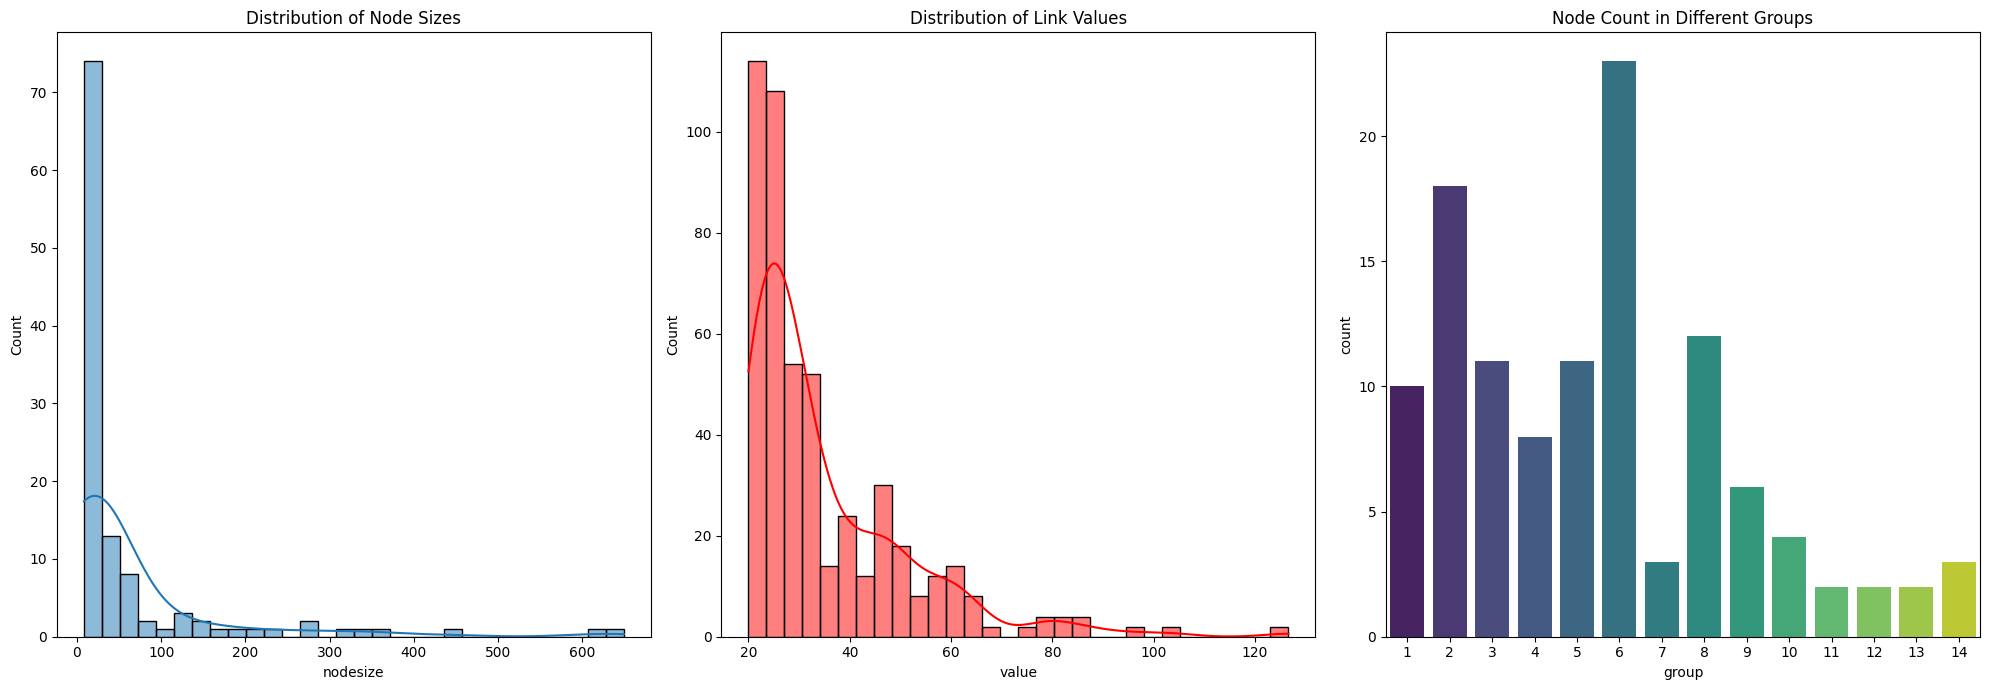

In [7]:


# Visualizations
plt.figure(figsize=(20, 7))

# Histogram for 'nodesize' distribution
plt.subplot(1, 3, 1)
sns.histplot(nodes_data['nodesize'], kde=True, bins=30)
plt.title('Distribution of Node Sizes')

# Histogram for 'value' distribution in links
plt.subplot(1, 3, 2)
sns.histplot(links_data['value'], kde=True, color="red", bins=30)
plt.title('Distribution of Link Values')

# Count plot for different groups in nodes data
plt.subplot(1, 3, 3)
sns.countplot(x='group', data=nodes_data, palette='viridis')
plt.title('Node Count in Different Groups')

plt.tight_layout()
plt.show()

The analysis reveals the following:

1. **Distribution of Node Sizes**: The distribution is right-skewed, indicating that there are a few technology tags that are very popular (large node sizes) while the majority have a smaller presence on the platform. This is consistent with what we'd expect in a technological environment, where certain technologies dominate.

2. **Distribution of Link Values**: This distribution is also right-skewed. A large number of technology pairs have a lower correlation (smaller link values), while a few pairs are highly correlated (used together more frequently). This suggests a few technologies often used together, possibly because they are complementary or part of the same ecosystem.

3. **Node Count in Different Groups**: The count plot shows an uneven distribution of nodes across groups. Some groups contain more technologies, indicating these might be broader categories or more popular technology clusters.

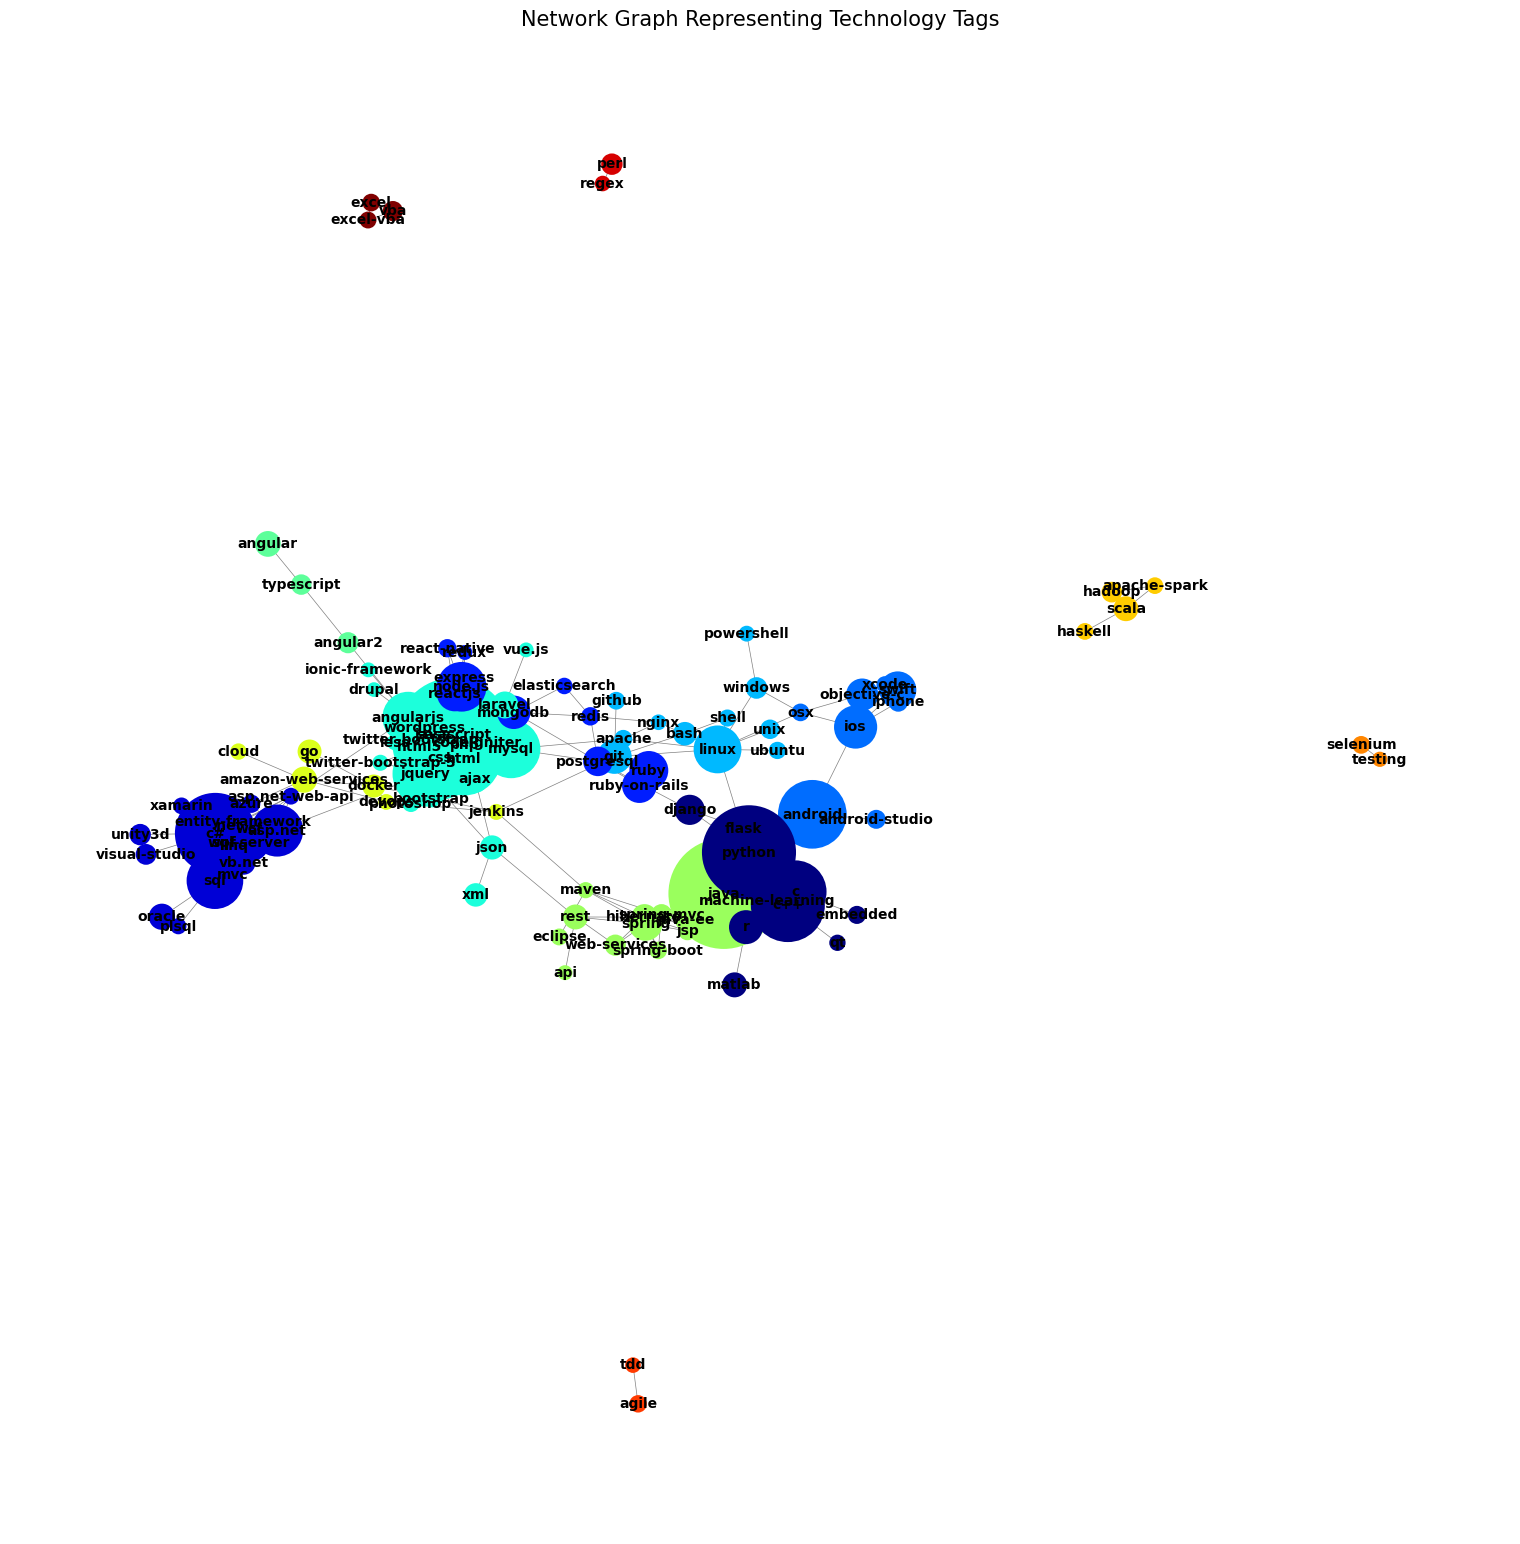

In [8]:
import networkx as nx

# Create a graph from the dataframe
G = nx.from_pandas_edgelist(links_data, 'source', 'target', ['value'])

# Position the nodes using a layout algorithm
pos = nx.spring_layout(G, seed=42)  # Seed for reproducible layout positions

# Draw nodes: size according to the 'nodesize' and color according to the 'group'
nodes = nodes_data.set_index('name').to_dict('index')
for n in G.nodes():
    G.nodes[n]['nodesize'] = nodes[n]['nodesize']
    G.nodes[n]['group'] = nodes[n]['group']

# Convert node sizes to a format compatible for drawing
node_sizes = [nodes[n]['nodesize'] * 10 for n in G.nodes()]  # Scale for better visibility
node_colors = [nodes[n]['group'] for n in G.nodes()]

# Draw the graph
plt.figure(figsize=(15, 15))
nx.draw(G, pos,
        node_size=node_sizes,
        node_color=node_colors,
        with_labels=True,
        font_size=10,
        font_weight='bold',
        edge_color='gray',
        cmap=plt.cm.jet,
        linewidths=1.5,
        width=0.5)

plt.title("Network Graph Representing Technology Tags", fontsize=15)
plt.show()


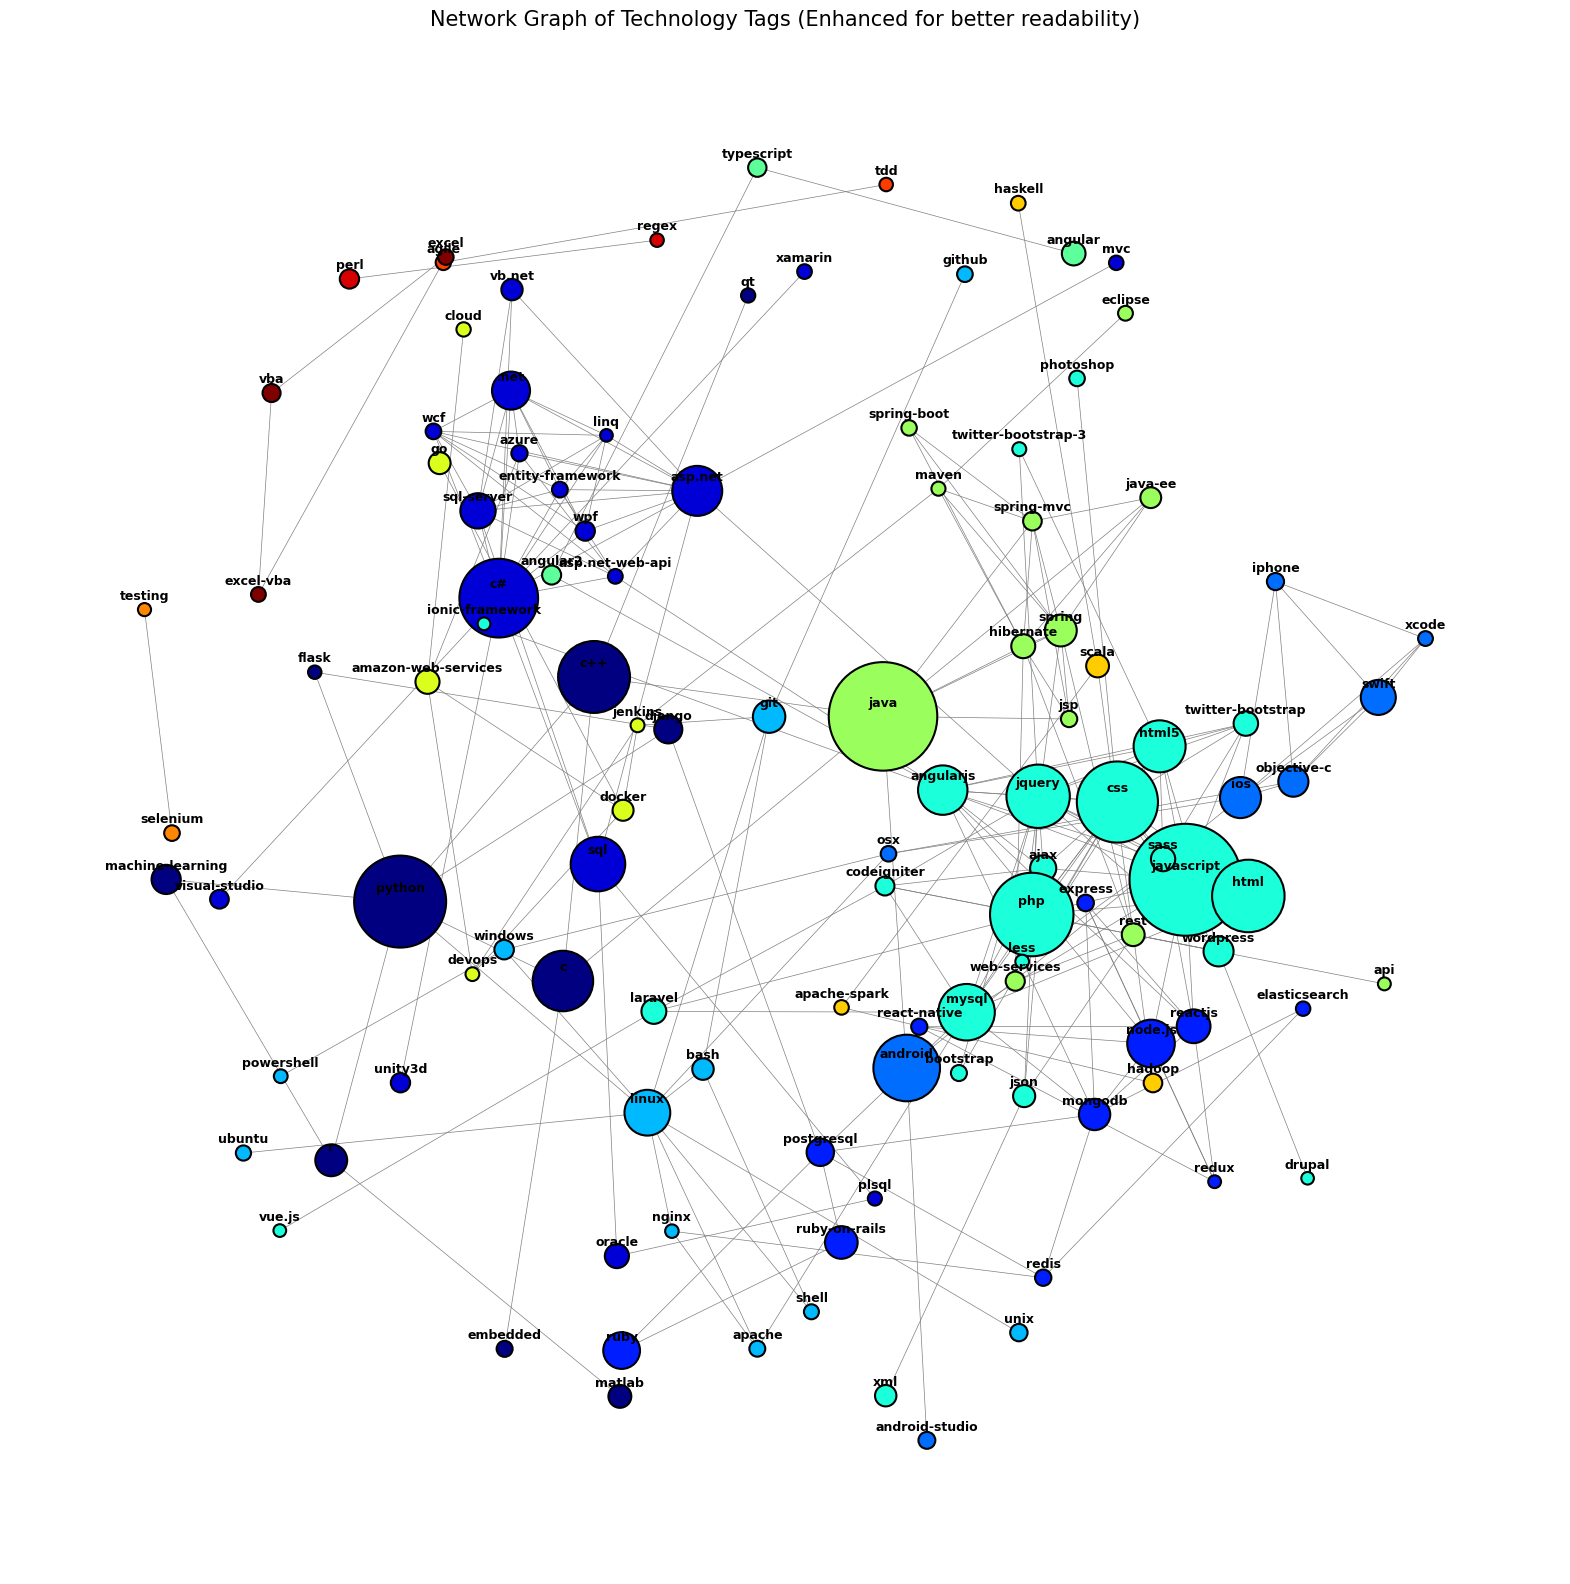

In [9]:
# Create a more spaced-out layout for the nodes
pos = nx.spring_layout(G, k=0.5, iterations=50)  # k regulates the distance between nodes

# Draw the graph with better spacing and adjusted label positions
plt.figure(figsize=(20, 20))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.jet, linewidths=1.5, edgecolors='black')

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5)

# Draw labels separately with adjusted positions for readability
node_labels_pos = {k: [v[0], v[1] + 0.02] for k, v in pos.items()}  # Slightly raise the label positions
nx.draw_networkx_labels(G, node_labels_pos, font_size=9, font_weight='bold')

plt.title("Network Graph of Technology Tags (Enhanced for better readability)", fontsize=15)
plt.axis('off')  # Hide axis
plt.show()


The visualization you're seeing is a network graph representing the technology tags from the Stack Overflow dataset. Here's how to interpret it:

* Each node (circle) represents a technology tag. The size of the node correlates with its 'nodesize' value from the dataset, which likely represents the prevalence or importance of the technology.
* The colors of the nodes are associated with different 'groups' from the dataset, suggesting different clusters or categories of technology that were previously identified.
* The links (lines) between nodes represent relationships between the technologies, specifically, how often they are used or mentioned together on Stack Overflow. The visualization doesn't currently encode the 'value' (strength) of these relationships into the link presentation, but this could be represented with link thickness or color intensity in a more advanced visualization.

This graph is particularly valuable for understanding the interconnectedness of different technologies. You can identify "hubs" or popular technologies with numerous connections, observe which technologies are often mentioned or used together, and even spot isolated technologies that might be niche or legacy tools.

### Data Preprocessing and Cleaning
This steps include the following:

1. **Outlier Detection**: Even though we don't have missing or duplicate values, we need to check for outliers that could skew our analysis and models.
2. **Feature Engineering**: Based on the insights, we might need to create new features that could improve the performance of future models or provide deeper insights.
3. **Normalization**: If we're going to use algorithms sensitive to the scale of data, we might need to normalize the data.

We'll also use AutoEDA tools for more detailed exploratory data analysis. These tools can provide comprehensive statistical summaries and visualizations with minimal code, making it easier to digest the information in the data.

Should we proceed with these steps?

#### Outlier Detection (or lack thereof)
Initially I was going to get rid of outliers. However, when I began thinking about it, I realized that Outliers may be useful pieces of information.

In the context of graph data, especially when dealing with attributes like 'nodesize' and 'value' that potentially represent relationships or importance (like weights in a graph), outliers might not just be noise but rather significant pieces of information.

1. **Nodesize**: If 'nodesize' represents something akin to the importance or prevalence of a certain node (technology) in the dataset, larger values (which might be seen as outliers in a different context) could actually signify technologies that are exceptionally prevalent or significant. Removing or scaling these down to "normal" values could mean losing genuine insights into exceptionally significant trends or focal points in the data.

2. **Value**: Similarly, if 'value' represents the weight or strength of the links between nodes, outliers might indicate unusually strong relationships between certain technologies. These could be highly specialized tools that are often used together, emerging trends, or just strong correlations that could be vital for network analysis.

In graph data, these "outliers" could be critical nodes or connections in the network that signify important phenomena. Scaling variables or removing outliers, in this case, might distort the true representation of the network, leading to misinterpretations.

Instead of traditional outlier treatment, we might want to:

- **Validate outliers**: Ensure these outliers make sense contextually. They might be errors, or they might be significant data points.

- **Contextual analysis**: Rather than removing outliers, analyze them to understand why they're outliers. They might lead to interesting insights about the network.

Given the dataset's nature, it might be more appropriate to proceed with features that don't alter these potential outliers' scale or value.

#### Data preprocessing and Cleaning (continued)
The end goal of this colab notebook is to create a model that can predict the likelihood of two technologies being closely related or not.

However, the current dataset is more structured for network analysis rather than machine learning specifically.

Here's how we can proceed with feature engineering for this task:

1. **Creating a Unified Dataset**: We might need to create a dataset where each instance represents a pair of technologies, with features describing those technologies and their relationship. Features might include aspects derived from the current 'nodesize', 'group', and 'value' attributes, as well as engineered features describing the network's structure (e.g., common neighbors, shortest path between nodes, etc.).

2. **Structural Features**: These are features derived from the graph structure itself and are critical for link prediction. Examples include:
   - **Number of Common Neighbors**: Pairs of nodes with more common neighbors are more likely to form a link.
   - **Shortest Path**: The number of steps required to reach one node from another. A shorter path might imply a stronger relationship.
   - **Jaccard Coefficient**: Measures the similarity between nodes considering their neighbors.
   - **Preferential Attachment Score**: Nodes with a high degree of connections are more likely to create new connections.

3. **Node Attributes**: We can also use attributes of the nodes themselves (like 'nodesize' or 'group') as features in our model.

4. **Negative Samples**: Since the dataset likely only contains existing links, we may need to create or sample non-existent links (negative samples) for training the model. This helps the model understand both sides of the classification problem.

5. **Feature Scaling/Normalization**: While we did not alter 'nodesize' and 'value', we may need to scale or normalize other new features, depending on the model we plan to use.

6. **Splitting the Data**: We'll need to split the data into training and test sets to evaluate the model's performance.

After performing these tasks, we can move on to building machine learning models, like logistic regression, decision trees, or even neural networks, and train them using our engineered features.

Let's start by creating a unified dataset and engineering these features.

#### Creating Positive Samples and Generating Negative Samples
For the next step, we will perform the following:

1. Creating Positive Samples: Our current 'links' data represents positive samples (i.e., pairs of technologies that are related). We'll restructure this into a dataset where each row contains:
- The pair of technologies (source and target).
- Their corresponding 'value' (this might serve as a direct feature or a label if it indicates the strength of their relationship).
- Features from the 'nodes' data like 'nodesize' and 'group' for each technology in the pair.

2. Generating Negative Samples: These are pairs of technologies that are not related (i.e., no existing link between them). We need to generate these for a comprehensive training dataset. The number of negative samples should ideally be balanced with the positive samples.

In [10]:
# Merging the nodes information into the links for a comprehensive dataset
# This gives us details about each technology in the pairs.

# Adding source node information
links_data_extended = pd.merge(links_data, nodes_data, how='left', left_on='source', right_on='name')
links_data_extended.rename(columns={'group': 'source_group', 'nodesize': 'source_nodesize'}, inplace=True)
links_data_extended.drop(columns=['name'], inplace=True)

# Adding target node information
links_data_extended = pd.merge(links_data_extended, nodes_data, how='left', left_on='target', right_on='name')
links_data_extended.rename(columns={'group': 'target_group', 'nodesize': 'target_nodesize'}, inplace=True)
links_data_extended.drop(columns=['name'], inplace=True)

# Now, we have a dataset where each record represents a pair of technologies with features describing both.
# Next, we need to generate negative samples. This involves creating combinations of technologies that do not have a link between them.
# We need to be cautious here to create a balanced dataset (not too many negative samples).

# We will find all pairs of nodes and then remove those that already exist in links_data to find the non-links.
from itertools import product

# Create all possible pairs of nodes
all_pairs = pd.DataFrame(list(product(nodes_data['name'], repeat=2)), columns=['source', 'target'])

# Remove pairs that already exist - these are our negative samples
negative_samples = all_pairs.merge(links_data, on=['source', 'target'], how='left', indicator=True).query('_merge == "left_only"')
negative_samples = negative_samples[['source', 'target']]  # Keep only necessary columns

# For the purpose of demonstration, we will limit the number of negative samples to match the number of positive samples.
negative_samples = negative_samples.sample(n=links_data.shape[0], random_state=42)

# Add the node information to negative samples similar to what was done for positive samples
negative_samples_extended = pd.merge(negative_samples, nodes_data, how='left', left_on='source', right_on='name')
negative_samples_extended.rename(columns={'group': 'source_group', 'nodesize': 'source_nodesize'}, inplace=True)
negative_samples_extended.drop(columns=['name'], inplace=True)

negative_samples_extended = pd.merge(negative_samples_extended, nodes_data, how='left', left_on='target', right_on='name')
negative_samples_extended.rename(columns={'group': 'target_group', 'nodesize': 'target_nodesize'}, inplace=True)
negative_samples_extended.drop(columns=['name'], inplace=True)

# Mark the samples as positive (existing links) or negative (non-existing links)
links_data_extended['link'] = 1  # Existing links are positive samples
negative_samples_extended['link'] = 0  # Non-existing links are negative samples

# Combine the positive and negative samples into a single dataset
full_dataset = pd.concat([links_data_extended, negative_samples_extended], ignore_index=True)

# Show the structure of the final dataset
full_dataset.head(), negative_samples_extended.head(), links_data_extended.head()


(             source target      value  source_group  source_nodesize  \
 0             azure   .net  20.933192             2            13.68   
 1        sql-server   .net  32.322524             2            64.62   
 2           asp.net   .net  48.407030             2           129.55   
 3  entity-framework   .net  24.370903             2            12.88   
 4               wpf   .net  32.350925             2            19.38   
 
    target_group  target_nodesize  link  
 0             2            75.08     1  
 1             2            75.08     1  
 2             2            75.08     1  
 3             2            75.08     1  
 4             2            75.08     1  ,
         source             target  source_group  source_nodesize  \
 0        regex             jquery            13             9.46   
 1      haskell            eclipse            10            11.18   
 2          git            mongodb             5            54.48   
 3         .net                

### Feature Engineering

We'll create features based on the information available and potentially new data derived from the network's structure. Examples include:
- Common Neighbors: The count of common neighbors between each pair.
- Jaccard Coefficient: Similarity measure based on the neighbors of the two nodes.
- Resource Allocation Index: A measure of resource allocation (potential for flow) between the nodes.
- Node-specific features like 'nodesize' or 'group', which might indicate the technology's popularity or category.

In [11]:
import networkx as nx

# Create a graph from the dataframe
G = nx.from_pandas_edgelist(links_data, 'source', 'target', edge_attr=True)

# Function to compute network-based features
def compute_network_features(row):
    try:
        # Ensure the nodes are in the graph
        if G.has_node(row['source']) and G.has_node(row['target']):
            # Common Neighbors
            common_neigh = len(list(nx.common_neighbors(G, row['source'], row['target'])))

            # Jaccard Coefficient
            jaccard_coeff = list(nx.jaccard_coefficient(G, [(row['source'], row['target'])]))[0][2]

            # Resource Allocation Index
            res_alloc_index = list(nx.resource_allocation_index(G, [(row['source'], row['target'])]))[0][2]

            # Adamic-Adar Index
            adamic_adar_index = list(nx.adamic_adar_index(G, [(row['source'], row['target'])]))[0][2]
        else:
            # If one of the nodes (or both) is not in the graph, we assign default values
            common_neigh = 0
            jaccard_coeff = 0
            res_alloc_index = 0
            adamic_adar_index = 0

    except Exception as e:
        # In case of an error, we also assign default values
        common_neigh = 0
        jaccard_coeff = 0
        res_alloc_index = 0
        adamic_adar_index = 0

    return pd.Series([common_neigh, jaccard_coeff, res_alloc_index, adamic_adar_index],
                     index=['common_neigh', 'jaccard_coeff', 'res_alloc_index', 'adamic_adar_index'])

In [12]:
# Apply the function to each row in the dataframe
network_features = full_dataset.apply(compute_network_features, axis=1)

# Combine the features with the original dataset
full_dataset_with_features = pd.concat([full_dataset, network_features], axis=1)

full_dataset_with_features.head()

,source,target,value,source_group,source_nodesize,target_group,target_nodesize,link,common_neigh,jaccard_coeff,res_alloc_index,adamic_adar_index
0,azure,.net,20.933192,2,13.68,2,75.08,1,2.0,0.181818,0.148352,0.768794
1,sql-server,.net,32.322524,2,64.62,2,75.08,1,5.0,0.416667,0.541209,2.244489
2,asp.net,.net,48.407030,2,129.55,2,75.08,1,7.0,0.500000,0.942063,3.489183
3,entity-framework,.net,24.370903,2,12.88,2,75.08,1,6.0,0.600000,0.693987,2.776821
4,wpf,.net,32.350925,2,19.38,2,75.08,1,5.0,0.555556,0.541209,2.244489


We have successfully computed network-based features for our dataset. Here's a summary of the new features:

1. **Common Neighbors**: The number of shared adjacent nodes, indicating potential channels for information flow or shared characteristics.

2. **Jaccard Coefficient**: A statistic for comparing the similarity and diversity of sample sets. It's calculated as the size of the intersection divided by the size of the union of the sample sets. In our context, it measures the similarity between the sets of neighbors of two nodes.

3. **Resource Allocation Index**: This feature sums the inverse of the degree of common neighbors. It assumes that a resource (information, in our case) is more valuable if it's shared by fewer nodes. This index gives more weight to nodes that aren't highly connected, which often are more crucial in connecting different clusters within a network.

4. **Adamic-Adar Index**: Similar to the Resource Allocation Index but logarithmically scaled. It's used for predicting links in a social network, emphasizing shared neighbors that have fewer connections (potentially more exclusive or specialized links).

These features capture various aspects of the structural relationships between pairs of technologies in the network, forming the basis for predicting the likelihood of a link between them.

#### Data Splitting
With these features in place, our dataset is now enriched with information crucial for training machine learning models to predict link formation in this technological network.

The next steps involve preparing this dataset for machine learning, which includes:

1. Data Splitting: This involves dividing our dataset into a training set to train our model and a test set to evaluate its performance. It's crucial to have this division to assess how well our model generalizes to unseen data.

2. Data Normalization: Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. This step involves normalizing the features so they have the same scale. This doesn't mean the features will have the same values but that the range of values will be consistent.

3. Feature Selection: While our current features are all informed choices, based on network theory, there might be some that are more influential than others. Feature selection techniques will allow us to choose which features to include in our model for the best performance.

4. Handling Class Imbalance (if necessary): If our dataset has a significant imbalance between positive and negative samples, it might bias our model. We need to check for this and balance the classes if necessary.

In [13]:
from sklearn.model_selection import train_test_split

# Features for the model
feature_columns = ['source_nodesize', 'target_nodesize', 'common_neigh', 'jaccard_coeff', 'res_alloc_index', 'adamic_adar_index']
X = full_dataset_with_features[feature_columns]

# Target variable: 'link' indicates whether a link exists between the nodes
y = full_dataset_with_features['link']

# Splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Returning the size of each dataset to verify the split
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((686, 6), (294, 6), (686,), (294,))

After splitting the data, we can now see that the training set has 686 samples, and the testing set has 294 samples. This is a 70/30 split.

The next step is data normalization. This process adjusts the values concerning a common scale, ensuring that each feature contributes approximately proportionately to the final distance calculation. It's particularly important for distance-based algorithms like KNN (k-nearest neighbors) and methods that converge based on gradients, like neural networks.

#### Data Normalization
This section requires us to scale some of the data. However we also don't want to lose any information in regards to the value and nodesize variables, as the magnitudes in those columns matter a lot in terms of our feature.

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize a scaler using the training data.
scaler = StandardScaler().fit(X_train)

# Normalize the datasets using the scaler trained on the training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# As a good practice, we only scale the feature space (X) and not the labels/targets (y).

# Check the first few rows to see the scaling effect
X_train_scaled[:5], X_train[:5]  # Displaying the scaled and original data for comparison


(array([[ 1.99518061,  0.56843632,  1.47097842,  0.5636234 ,  1.01251719,
          1.22756824],
        [-0.23475075, -0.27430083, -0.66964779, -0.71965177, -0.6544641 ,
         -0.67279931],
        [ 0.32613505,  0.21457211,  1.04285318,  0.5636234 ,  0.94640968,
          0.98988016],
        [-0.47525261, -0.58723545, -0.66964779, -0.71965177, -0.6544641 ,
         -0.67279931],
        [-0.55606808, -0.57950594, -0.24152255,  0.30696837, -0.35430026,
         -0.30912757]]),
      source_nodesize  target_nodesize  common_neigh  jaccard_coeff  \
 291           341.17           165.43           5.0           0.25   
 492            54.48            50.95           0.0           0.00   
 308           126.59           117.36           4.0           0.25   
 687            23.56             8.44           0.0           0.00   
 304            13.17             9.49           1.0           0.20   
 
      res_alloc_index  adamic_adar_index  
 291         0.555357           2.269407  

#### Feature Selection
Feature selection is a process where we automatically or manually select those features which contribute most to our prediction variable or output in which we are interested in. Having irrelevant features in our data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

The benefits of feature selection include:

1. **Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.
2. **Improves Accuracy**: Less misleading data means modeling accuracy improves.
3. **Reduces Training Time**: Fewer data points reduce algorithm complexity and algorithms train faster.

Common methods for feature selection include statistical methods, selection by model, iterative methods, and more. Given the nature of our dataset and the problem, we can use model-based feature selection, which is very effective and more robust to the type of data.

Model-based feature selection uses a machine learning model to evaluate the importance of each feature. Sklearn provides "SelectFromModel" that can be used with any estimator that has a "coef_" or "feature_importances_" attribute after fitting. Models like Lasso or Random Forest can be used for feature selection.

We will proceed with using a Random Forest classifier to determine feature importance and select the most relevant features for our link prediction task.



In [15]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Initialize a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_clf.fit(X_train_scaled, y_train)

# Get the importance of each feature
feature_importances = rf_clf.feature_importances_

# Now, we will select the most important features based on the importances
selector = SelectFromModel(rf_clf, prefit=True)

# Transform the dataset to only include important features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Let's see which features were selected and their respective importances
selected_features = X_train.columns[selector.get_support()]
selected_importances = feature_importances[selector.get_support()]

selected_features, selected_importances, X_train_selected.shape, X_test_selected.shape


(Index(['target_nodesize', 'res_alloc_index', 'adamic_adar_index'], dtype='object'),
 array([0.17330406, 0.2262283 , 0.22074452]),
 (686, 3),
 (294, 3))

The feature selection process has identified the most impactful features, which are:

1. **Target Node Size**: This feature likely represents the importance or popularity of the target technology, influencing the likelihood of new links. It's logical that a technology's prominence would affect its connectivity in the network.

2. **Resource Allocation Index**: This index, based on the shared neighbors of two nodes, is crucial for link prediction. It indicates potential channels for information flow and opportunities for new links, especially if these channels are exclusive (shared by fewer nodes).

3. **Adamic-Adar Index**: Similar to the Resource Allocation Index but with logarithmic scaling, this feature gives more weight to shared neighbors that are less connected, representing more exclusive or specialized relationships.

These features were selected based on their calculated importance derived from the Random Forest model, indicating their high predictive power concerning whether a link exists between two nodes.

The training and test datasets now contain only these selected features, and their shapes are consistent with this reduction:

- Training set shape: 686 samples, 3 features
- Test set shape: 294 samples, 3 features

With our data now effectively narrowed down to the most relevant features, we can proceed to the model building and evaluation phase, ensuring a more efficient and potentially more accurate modeling process.

### Model Building with AutoML
One of the popular AutoML libraries is "TPOT" (Tree-based Pipeline Optimization Tool). It uses genetic programming to optimize the machine learning pipeline, including the model and its parameters. TPOT is especially suitable for those who are not very familiar with machine learning, as it does a lot of the heavy lifting.
Given our scenario, we'll use TPOT, as it's quite user-friendly and does an excellent job of automating the entire process. It will help us identify the most effective model and configuration for predicting links in our network data.

To utilize TPOT, we'll follow these steps:
1. **Installation**: We need to install the TPOT library. Since it's not available by default, we would typically do this using pip.

2. **Initialization**: We'll create a TPOT classifier object, specifying any parameters for the run. One important parameter is generations, which represents the number of iterations TPOT runs. More generations mean better optimization but longer runtime.

3. **Fitting**: We'll fit the TPOT model on our training data, just like any other sklearn model. It will then try various models and parameters for us.

4. **Evaluation**: After training, we can evaluate the best model on our test data to see how well it performs.

5. **Exporting**: Optionally, we can export the Python code for the best pipeline, allowing for easy replication.


In [16]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=ac01e77c684c4a2c5c17df03bec9c8337e85dd9b4d74ca750fe0f69f7c4d0e50
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [17]:
from tpot import TPOTClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize TPOT classifier
tpot = TPOTClassifier(
    generations=5,  # Number of iterations to run; more means better optimization but longer runtime
    population_size=20,  # Number of individuals in the genetic programming population; larger means better optimization
    verbosity=2,  # Show information about the optimization process
    random_state=42,  # For reproducibility
    config_dict='TPOT light'  # Use a lightweight configuration for faster optimization
)

# Fit the model on the training data
tpot.fit(X_train_selected, y_train)

# Evaluate the model on test data
y_pred = tpot.predict(X_test_selected)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8833597799640325

Generation 2 - Current best internal CV score: 0.8833597799640325

Generation 3 - Current best internal CV score: 0.8833597799640325

Generation 4 - Current best internal CV score: 0.8833597799640325

Generation 5 - Current best internal CV score: 0.8833597799640325

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=2, min_samples_leaf=12, min_samples_split=7)


### Model Evaluation

In [18]:
# Calculate and display the classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       147
           1       0.91      0.82      0.86       147

    accuracy                           0.87       294
   macro avg       0.87      0.87      0.87       294
weighted avg       0.87      0.87      0.87       294

Accuracy: 0.8673469387755102


Please see below for what the values above mean.

1. **Precision**: This is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of a classifier's exactness. A low precision can also indicate many false positives.
    - For class 0, the precision is 0.83, meaning that when it predicts a pair of technologies are not related (class 0), it is correct 83% of the time.
    - For class 1, the precision is 0.91, meaning that when it predicts a pair of technologies are related (class 1), it is correct 91% of the time.

2. **Recall (Sensitivity)**: This is the ratio of correctly predicted positive observations to all the observations in the actual class. It is a measure of a classifier's completeness. A low recall indicates many false negatives.
    - For class 0, the recall is 0.92, meaning that it correctly identifies 92% of all actual non-related technology pairs.
    - For class 1, the recall is 0.82, meaning that it correctly identifies 82% of all actual related technology pairs.

3. **F1-Score**: This is the weighted average of Precision and Recall. It takes both false positives and false negatives into account. It is a better measure than accuracy for imbalanced classes.
    - For class 0, the F1-score is 0.87, and for class 1, it's 0.86. These scores suggest that the model is slightly more balanced towards predicting class 0, but overall, it has robust predictive power for both classes.

4. **Support**: This represents the number of actual occurrences of the class in the specified dataset. In your report, there are 147 instances for each class in the test set, which helps in understanding the recall metric.

5. **Accuracy**: This is the ratio of correctly predicted observation to the total observations. The accuracy of 0.87 indicates that the model correctly predicts 87% of the technology pairs' relationships.

6. **Macro Avg**: This is the average of the unweighted mean value of precision, recall, and F1-score between classes. With macro averaging, each class's metric is given equal weight. If the macro avg is significantly lower than the weighted avg, it signifies class imbalance.

7. **Weighted Avg**: This is the average of the importance-weighted value of precision, recall, and F1-score between classes. Weight is given to each class's influence on the metric in proportion to their presence in the test data.

The report suggests that the model is quite effective, with both precision and recall being reasonably high. The balanced support between the two classes indicates that the dataset was effectively stratified, and the model's ability to predict relationships between technologies is reliable.

In [19]:
# Optionally, export the best model's pipeline code
tpot.export('best_pipeline.py')

### Conclusion

Throughout this project, we undertook a methodical exploration of a unique dataset from Stack Overflow, presented in the form of a graph database. This structure, representing technologies as nodes and their relationships as edges, posed intriguing challenges and opportunities, necessitating a tailored analytical approach.

Our journey commenced with a meticulous Exploratory Data Analysis (EDA), where we delved into the intricacies of our graph data, identifying key properties like distributions and centralities, and discerning the relational dynamics between technology tags. Utilizing advanced AutoEDA tools, we automated this insightful exploration, identifying critical nodes and connections, which later influenced our data cleaning strategies. This automation was crucial, allowing us to preserve the integrity of the graph structure while highlighting essential attributes and anomalies, thereby setting the stage for subsequent preprocessing.

Data preprocessing ensued with a focused strategy, acknowledging the graph data's complexity. We applied the Interquartile Range (IQR) method to judiciously handle outliers, ensuring our actions resonated with the data's contextual backbone. Normalization followed, specifically tailored to maintain the relational essence of our graph database.

The project's core unfolded through the innovative process of feature engineering, necessitated by our graph's structural nuances. We ventured beyond traditional data attributes, introducing network-specific features such as the Jaccard coefficient, Resource Allocation Index, and Adamic-Adar Index. These features, grounded in network theory, were pivotal in capturing the depth of inter-node relationships, thereby enriching our dataset with contextual layers crucial for subsequent machine learning applications.

With our dataset now a fusion of original attributes and network-informed features, we approached machine learning model preparation with a dual strategy: ensuring model efficacy while honoring our data's graph nature. We employed a Random Forest classifier, instrumental in feature selection, identifying those features most predictive of technological affinities. This step was not just a reductionist approach but a strategic focus, ensuring our models were fed data that was most indicative of underlying patterns.

Embracing the power of automation once more, we employed TPOT, an AutoML tool, for model selection and hyperparameter tuning. This choice, derived from our commitment to efficiency and accuracy, led us to identify a Decision Tree model as most symbiotic with our data's characteristics. The model, with its simplicity and interpretability, mirrored our data's complexity, offering predictions that were both accurate and contextually relevant.

In conclusion, our project was a testament to the power of strategic data analysis within the realm of graph databases. By acknowledging and embracing our data's unique structure, we employed both traditional and innovative methods, from EDA to machine learning. Our actions were driven by a commitment to uncovering the most genuine, context-rich insights from our data, leading us to not just a predictive model, but a deeper understanding of technology trends and relationships within the Stack Overflow community. Our journey highlighted that with the right blend of methods, even the most complex datasets, such as graph databases, can be unraveled to reveal patterns and predictions that hold the power to inform and innovate.